# Preparation
1. Importing necessary libraries and modules.
2. Defining a function to plot the predicted vs measured values for each monomer.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from wtencv import *


def draw_predicted_measured_plot(
    true,
    pred,
    scatter_title=None,
    scale_span=0.25,
    plot_color="black"
):
    plt.figure(figsize=(7,7))
    
    if scatter_title is not None:
        plt.title(scatter_title)
    
    plot_min = np.min((np.min(true), np.min(pred)))
    plot_max = np.max((np.max(true), np.max(pred)))
    
    plt.plot([-1,3], [-1,3], c="black")
    plt.scatter(true, pred, c=plot_color)

    plt.xlabel("Predicted")

    plt.xlim([plot_min, plot_max])
    
    plt.xticks(np.arange(plot_min//scale_span, plot_max/scale_span)*scale_span)

    plt.ylabel("Measured")

    plt.ylim([plot_min, plot_max])
    plt.yticks(np.arange(plot_min//scale_span, plot_max/scale_span)*scale_span)
    plt.show()

# Predicting Monomer Concentration from Spectra

This notebook provides an example of predicting the concentration of a single monomer from its spectrum. The code uses a wavelet transform and elastic net cross-validation (WT-ENCV) approach to model the relationship between the spectrum and the monomer concentration.

The process involves the following steps:

1. Setting up parameters for the wavelet transform and elastic net cross-validation.
1. Reading the dataset from a CSV file.
1. Defining the colors for different monomers for visualization.
1. Selecting the monomer to be analyzed.
1. Splitting the dataset into training and testing sets.
1. Fitting the model on the training data.
1. Predicting the monomer concentration on the testing data.
1. Evaluating the model performance using R2, MAE, and RMSE metrics.
1. Visualizing the model coefficients.

Please note that this is a simplified example and the actual process may require additional steps such as data preprocessing, feature selection, and hyperparameter tuning.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.582e-03, tolerance: 1.006e-03
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.754e-03, tolerance: 1.006e-03
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

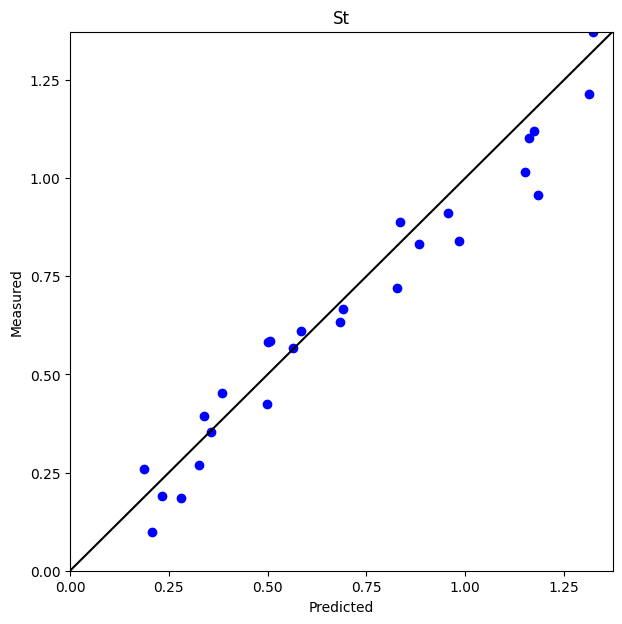

R2: 0.944, MAE: 0.072, RMSE: 0.085


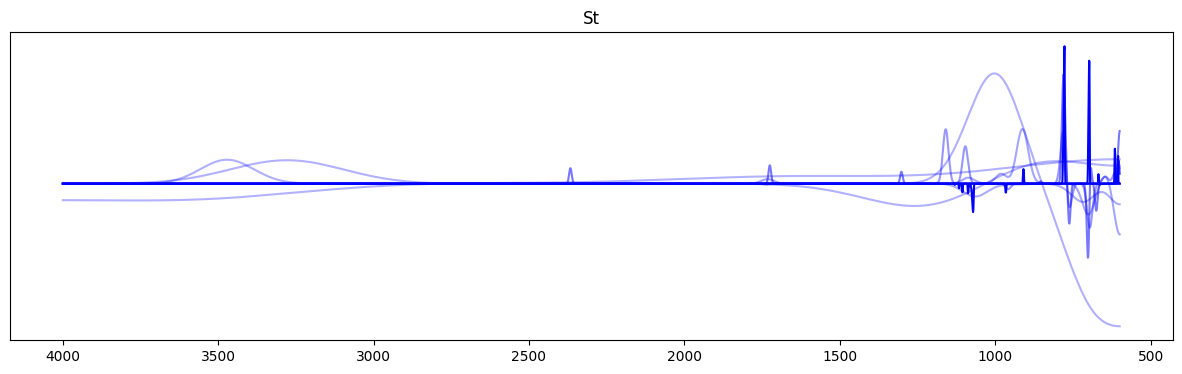

In [8]:
wavelet_num = 10
scaling = False
proportion = 4

file_name = "data_sets.csv"
df = pd.read_csv(file_name)
ir_datapoints_num = 3527
wave_numbers = np.array(df.columns[-ir_datapoints_num:]).astype(float)

colors = {
    "St": "blue",
    "THFMA": "purple",
    "CHMA": "green",
    "GMA": "red",
    "PACS": "darkgoldenrod",
    "MMA": "orange"
}

monomer_names = [
    "St",
#     "THFMA",
#     "CHMA",
#     "GMA",
#     "PACS"
]

for monomer_name in monomer_names:
    df_monomer = df[df["M1_name"]==monomer_name]

    X = df_monomer.values[:, -ir_datapoints_num:]
    y = df_monomer["Conc_M1_monomer[mmol/g]"].values
    
    # If you give lower max_iter, you will face a large number of Warnings.
    wtencv = WTENCV(
        wave_numbers,
        wavelet_num=wavelet_num,
        proportion=proportion,
        scaling=scaling,
        cv_fold=5,
        max_iter=10,
        random_state=1,
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    wtencv.fit(X_train, y_train)
    y_pred = wtencv.predict(X_test)    
    
    draw_predicted_measured_plot(y_test, y_pred, scatter_title=monomer_name, plot_color=colors[monomer_name])
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

    wtencv.visualize_coef(title=monomer_name, color=colors[monomer_name])

# Predicting Concentrations of Multiple Monomers from Spectra

This notebook provides an example of predicting the concentrations of multiple monomers simultaneously from their spectra. The code uses a wavelet transform and elastic net cross-validation (WT-ENCV) approach to model the relationship between the spectra and the monomer concentrations.

The process involves the following steps:

1. Setting up parameters for the wavelet transform and elastic net cross-validation.
1. Reading the dataset from a CSV file.
1. Defining the colors for different monomers for visualization.
1. Selecting the monomers to be analyzed.
1. Splitting the dataset into training and testing sets.
1. Fitting the model on the training data for each monomer.
1. Predicting the monomer concentrations on the testing data.
1. Evaluating the model performance using R2, MAE, and RMSE metrics for each monomer.
1. Visualizing the model coefficients for each monomer.

Please note that this is a more complex example and the actual process may require additional steps such as data preprocessing, feature selection, and hyperparameter tuning. The performance of the model may vary depending on the number and type of monomers being analyzed.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003493548308519223, tolerance: 0.002034341491679012
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004301618297549936, tolerance: 0.002034341491679012
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005059883271290033, tolerance: 0.002034341491679012
  model = cd_fast.enet_coordinate_descent_multi_task(
/home/codespace/.local/lib/pyth

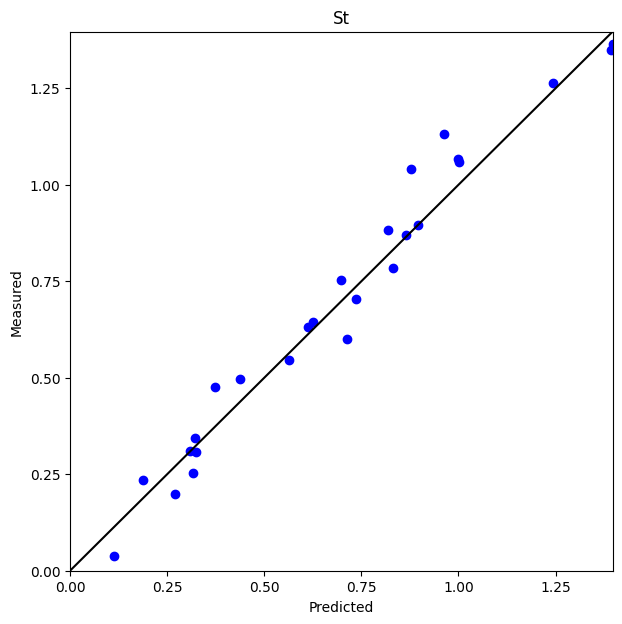

R2: 0.962, MAE: 0.053, RMSE: 0.069


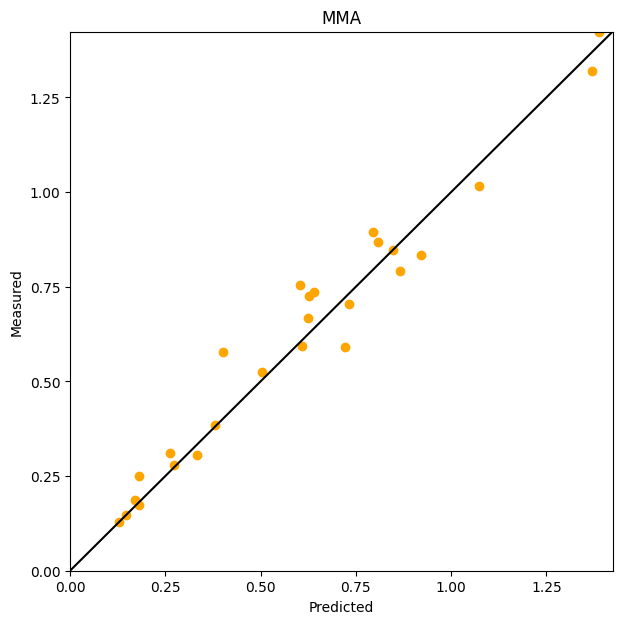

R2: 0.957, MAE: 0.054, RMSE: 0.072


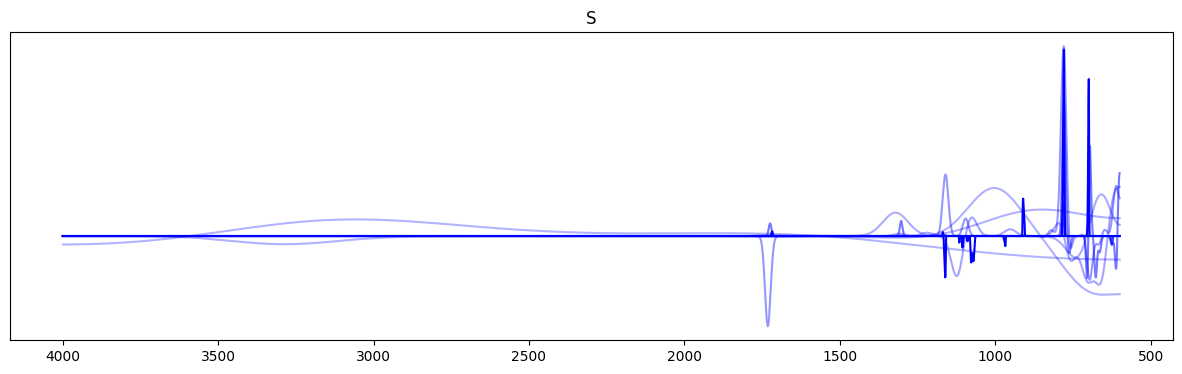

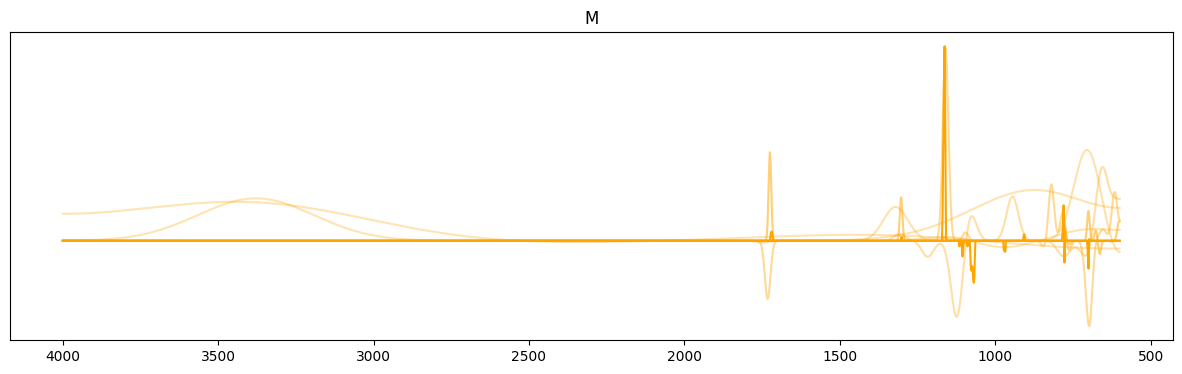

In [9]:
wavelet_num = 10
scaling = False
proportion = 4

file_name = "data_sets.csv"
df = pd.read_csv(file_name)
ir_datapoints_num = 3527
wave_numbers = np.array(df.columns[-ir_datapoints_num:]).astype(float)

colors = {
    "St": "blue",
    "THFMA": "purple",
    "CHMA": "green",
    "GMA": "red",
    "PACS": "darkgoldenrod",
    "MMA": "orange"
}

monomer1_names = [
    "St",
#     "THFMA",
#     "CHMA",
#     "GMA",
#     "PACS"
]

monomer2_name = "MMA"

target_variables = ["Conc_M1_monomer[mmol/g]", "Conc_M2_monomer[mmol/g]"]

for monomer1_name in monomer1_names:
    df_monomer = df[(df["M1_name"]==monomer1_name) & (df["M2_name"]==monomer2_name)]

    X = df_monomer.values[:, -ir_datapoints_num:]
    ys = df_monomer[target_variables].values
    
    # If you give lower max_iter, you will face a large number of Warnings.
    wtencv = WTENCV(
        wave_numbers,
        wavelet_num=wavelet_num,
        proportion=proportion,
        scaling=scaling,
        cv_fold=5,
        max_iter=10,
        random_state=1,
    )
    X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2)
    
    wtencv.fit(X_train, ys_train)
    ys_pred = wtencv.predict(X_test)    
    
    for y_test, y_pred, title, color in zip(ys_test.T, ys_pred.T,[monomer1_name, monomer2_name], [colors[monomer1_name], colors[monomer2_name]]):
        draw_predicted_measured_plot(y_test, y_pred, scatter_title=title, plot_color=color)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R2: {r2:.3f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")

    wtencv.visualize_coef(title=[monomer1_name, monomer2_name], color=[colors[monomer1_name], colors[monomer2_name]])
